### EL KETTANEH Joseph - M1 SD
# TP5 Apprentissage Automatique 2 - Étude comparative

L’objectif de ce TP est de comparer plusieurs méthodes d’apprentissage sur plusieurs bases de données de classification.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Analyse de base de données

- heart : 270 instances, 13 caractéristiques, 2 classes
    - Je remarque que les valeures de classification sont categorieles donc il faut la rendre {-1,1}
        - present => 1
        - absent => -1
        
        
- diabetes : 768 instances, 8 caractéristiques, 2 classes
    - Je remarque que les valeures de classification sont categorieles donc il faut la rendre {-1,1}
        - tested_positive => 1
        - testted_negative => -1
        
        
- vehicle : 846 instances, 19 caractéristiques, 4 classes
    - Je remarque que les valeures de classification sont categorieles donc il faut la rendre numeriques.
    - Alors il faut les remplacées par 4 classes numeriques:

        - van => 0
        - saab => 1
        - bus => 2
        - opel => 3
        

- segment : 2310 instances, 20 caractéristiques, 7 classes 
    - Je remarque que les valeures de classification sont categorieles donc il faut la rendre numeriques.
    - Alors il faut les remplacées par 7 classes numeriques:
        - path => 0
        - foliage => 1
        - sky => 2
        - grass => 3
        - brickface => 4
        - cement => 5
        - window => 6


- spambase : 4601 instances, 58 caractéristiques, 2 classes
    - Je remarque que les valeures de classification sont {0,1} donc il faut la rendre {-1,1} pour les SVM.
    - Alors il faut remplacer:
        - 0 => -1
        

#### Je propose de centrer et reduire les données
Les variables numériques sont souvent à des échelles différentes et couvrent des plages différentes, de sorte qu'elles ne peuvent pas être facilement comparées. 

De plus, les variables ayant de grandes valeurs peuvent dominer celles ayant de plus petites valeurs lors de l'utilisation de certaines techniques de modélisation. 

Le centrage et la mise à l'échelle sont des tâches de prétraitement courantes qui placent les variables numériques sur une échelle commune afin qu'aucune variable ne domine les autres.

### 2. Proposer une procédure de découpage des bases de données respectant les principes vus en cours¶

Je propose de decouper les données en 3 ensembles:
   - Ensemble d'apprentissage (Pour enterner les modeles)
   - Ensemble de validation (Pour Sélectionner le bon modèle)
   - Ensemble de test (Pour tester le modèle retenu)

### 3. Proposer pour chaque méthode un protocole de sélection d’hyper-paramètres pour que chacune d’elle soit comparée avec son plein potentiel en généralisation

Je propose de choisir les Hyper-paramètres suivantes pour le GridSearch avec une validation croisée et 5 Folds:
   - LogisticRegression :
       - C : Parametre de régularisation.
       - solver  : Représente l’algorithme à utiliser pour le problème d’optimisation.
       - penalty : Parametre de régularisation.
       
       
   - LinearSVC:
       - tol : la tolérance pour le critère d'arrêt. Ceci indique à Scikit d'arrêter la recherche d'un minimum (ou d'un maximum) une fois qu'une certaine tolérance est atteinte.
       - C : Parametre de régularisation.
       
    
   - SVM avec noyau RBF:
        - C : indique à l'optimisation SVM dans quelle mesure vous voulez éviter de mal classer chaque exemple d'apprentissage. Pour les grandes valeurs de C, l'optimisation choisira un hyperplan à marge réduite si cet hyperplan permet de mieux classer correctement tous les points d'apprentissage.
        - gamma : définit la portée de l'influence d'un seul exemple d'apprentissage, les valeurs faibles signifiant "loin" et les valeurs élevées signifiant "proche".

### Le script python qui implémente le protocole expérimental de la comparaison des 3 modéles

heart.csv
Le temps d'apprentissage et Validation 2.0416817665100098 

diabetes.csv
Le temps d'apprentissage et Validation 5.135854005813599 

vehicle.csv
Le temps d'apprentissage et Validation 61.80132079124451 

segment.csv
Le temps d'apprentissage et Validation 126.8199110031128 

spambase.csv
Le temps d'apprentissage et Validation 121.95739316940308 



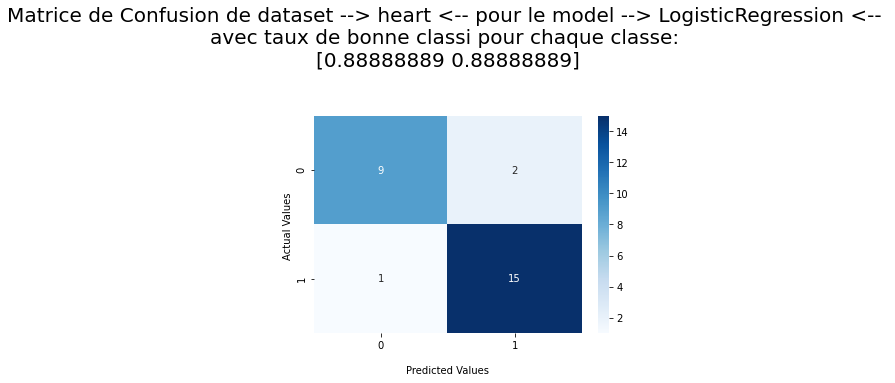

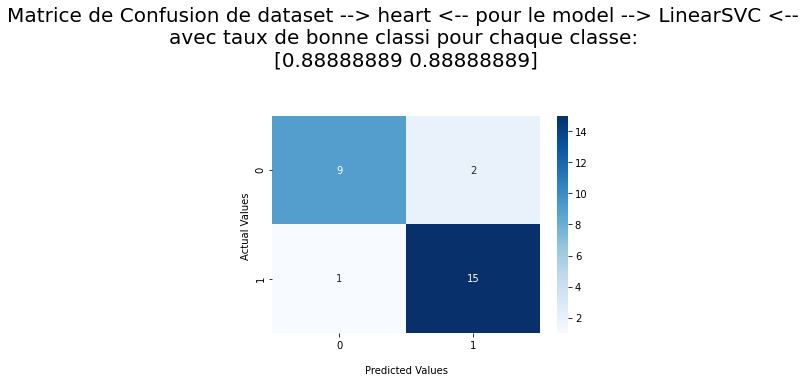

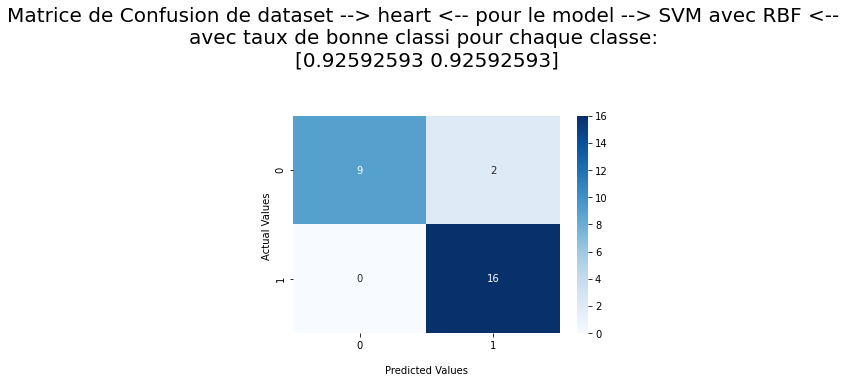

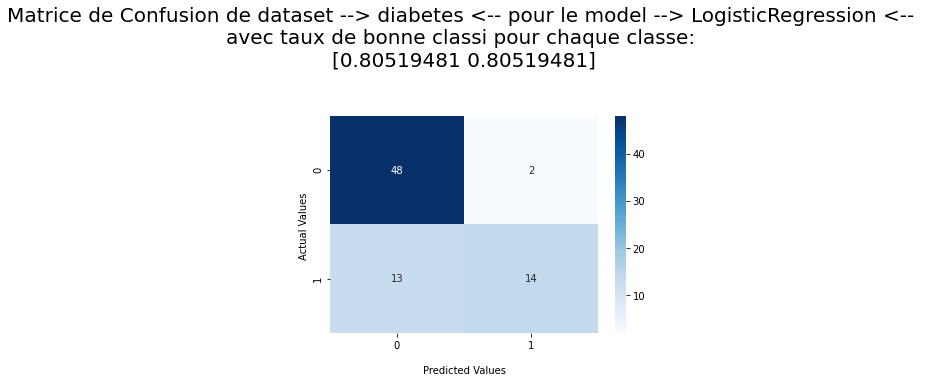

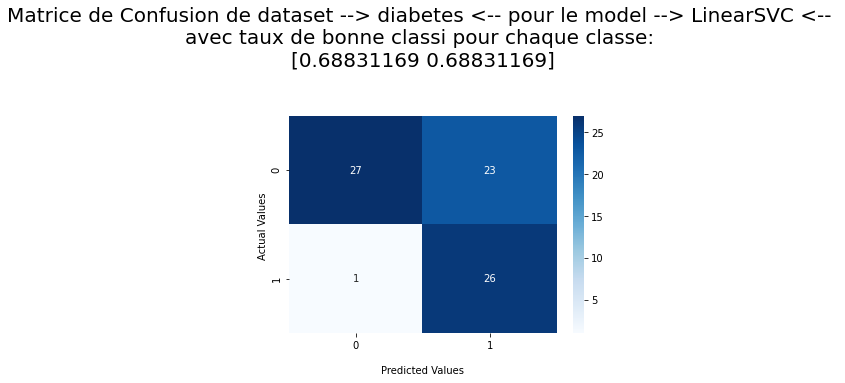

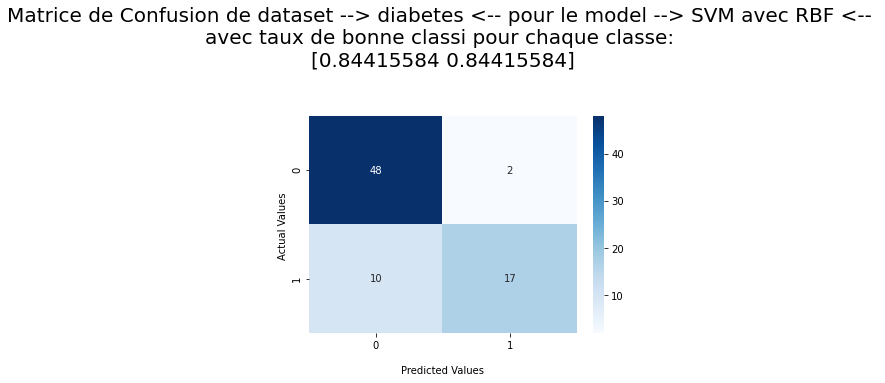

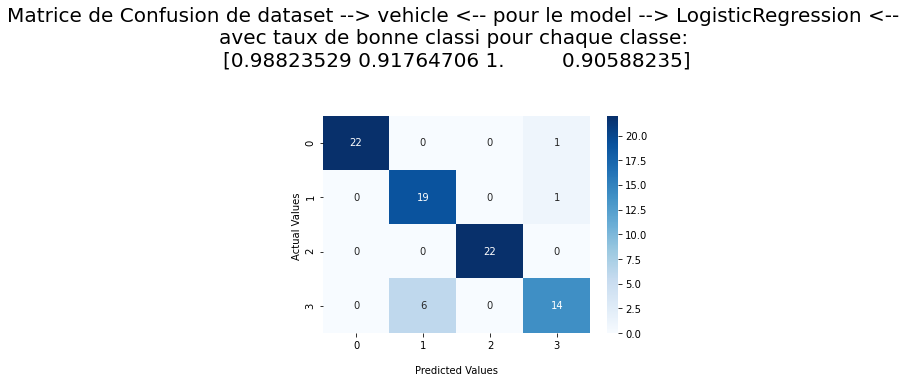

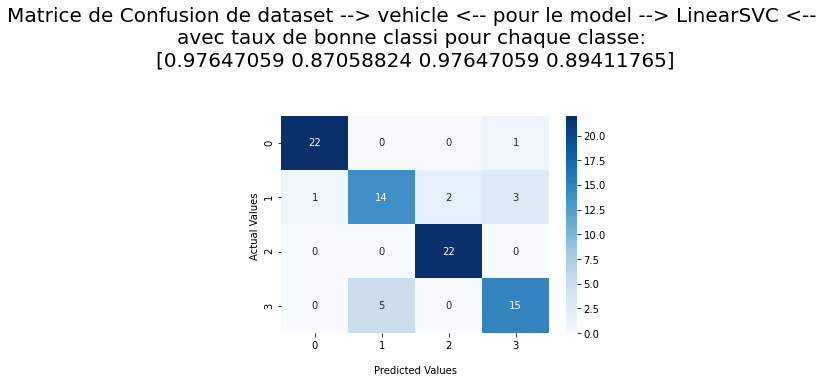

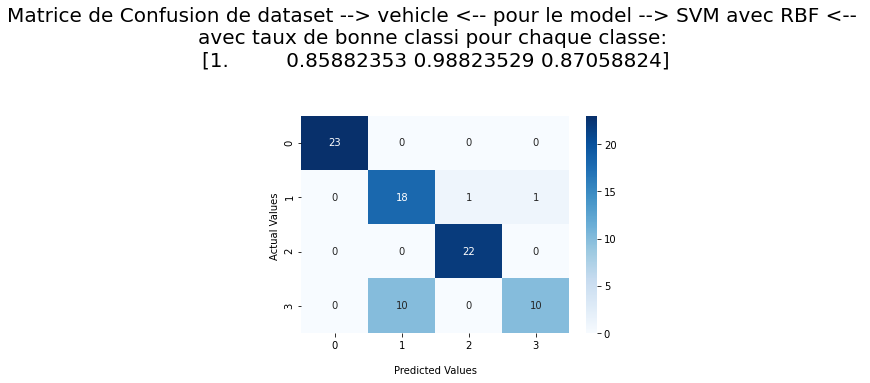

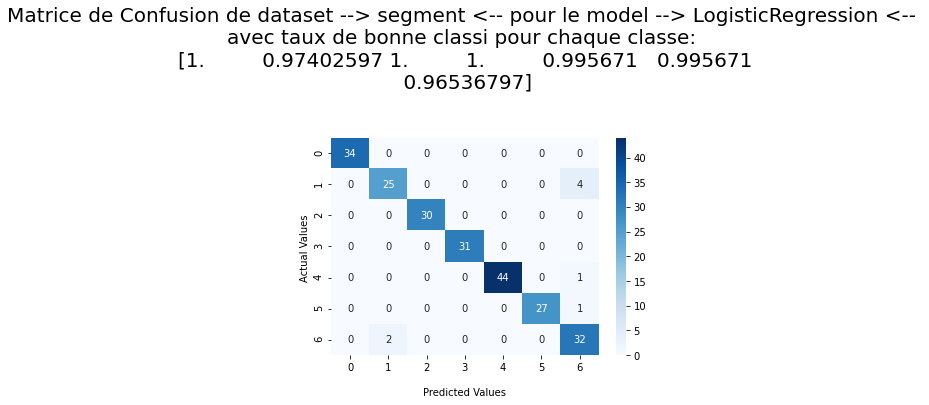

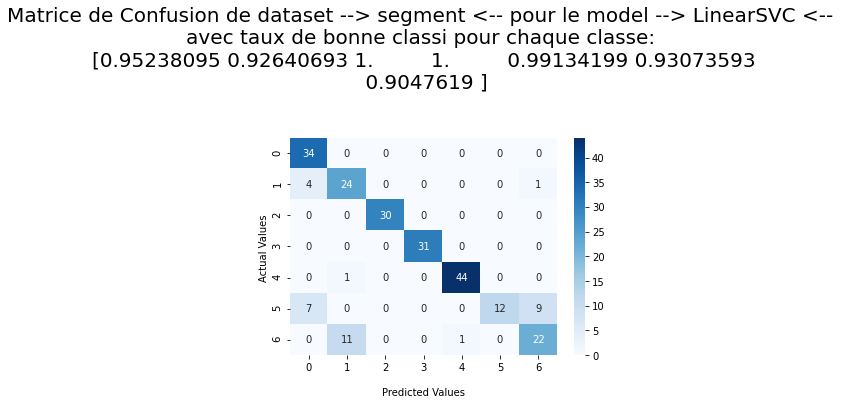

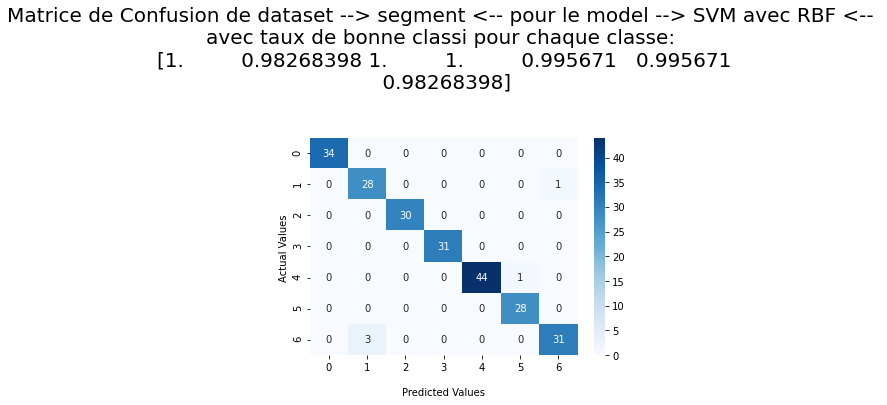

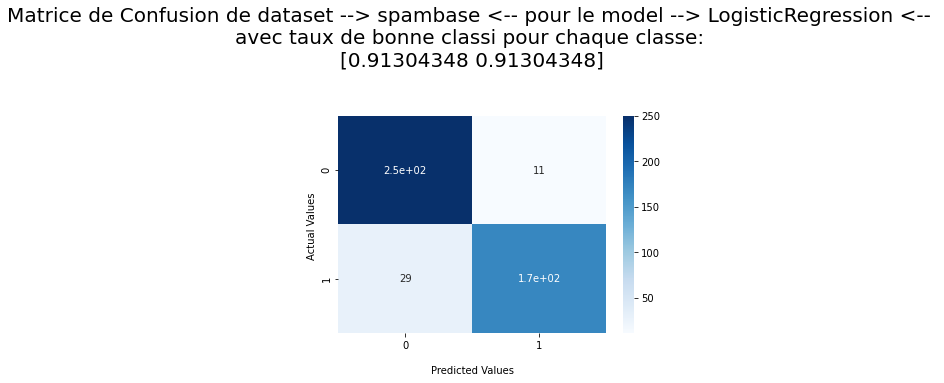

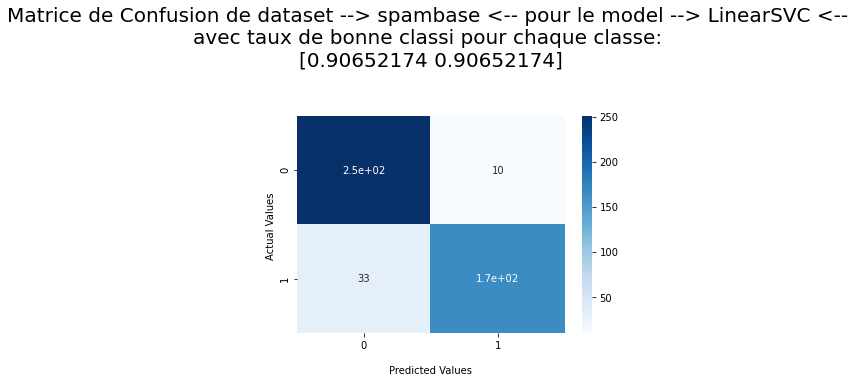

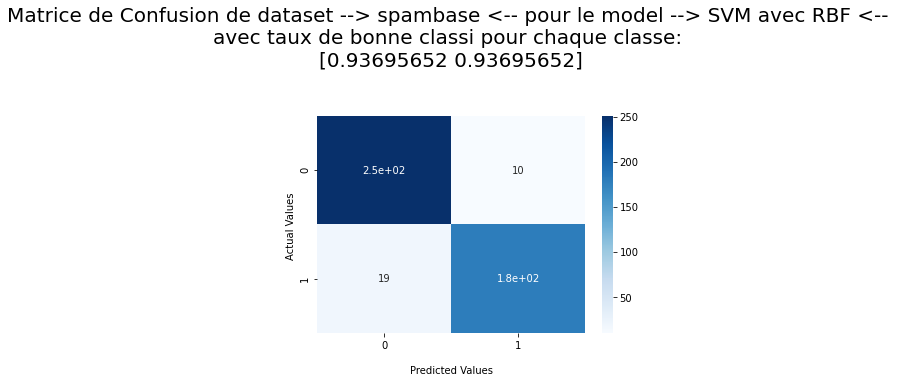





 Le tableau Resultats des modéles pour toutes les datasets


Dataset,Model,Best HyperParams,Best estimator,Taux de bonne classi sur données dapprentissage,Taux de bonne classi sur données de Validation
heart,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}","LogisticRegression(C=1, solver='newton-cg')",0.861205,0.888889
,LinearSVC,"{'C': 1, 'tol': 1e-05}","LinearSVC(C=1, tol=1e-05)",0.861205,0.888889
,SVM avec RBF,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}","SVC(C=1000, gamma=0.0001)",0.870402,0.925926
diabetes,LogisticRegression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...","LogisticRegression(C=0.1, solver='newton-cg')",0.752472,0.805195
,LinearSVC,"{'C': 10, 'tol': 0.1}","LinearSVC(C=10, tol=0.1)",0.762242,0.688312
,SVM avec RBF,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}","SVC(C=1000, gamma=0.001)",0.757324,0.844156
vehicle,LogisticRegression,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-...","LogisticRegression(C=100, solver='newton-cg')",0.804749,0.905882
,LinearSVC,"{'C': 0.1, 'tol': 0.001}","LinearSVC(C=0.1, tol=0.001)",0.766242,0.858824
,SVM avec RBF,"{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}","SVC(C=1000, gamma=0.01)",0.831351,0.858824
segment,LogisticRegression,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}","LogisticRegression(C=10, solver='newton-cg')",0.956168,0.965368


In [7]:
import time

def center_and_scale(X):
    X_colmeans = X.sum()/X.shape[0] 
    X_centered = X - X_colmeans
    X_column_deviations = X.std(axis=0)  
    X_centered_and_scaled = X/X_column_deviations 
    
    return X_centered_and_scaled

def load_CSV_dataset(name): 
    data  = pd.read_csv(name)
    
    if name == 'heart.csv':
        data = data.replace(['present','absent'],[1,-1])
        
    elif name == 'diabetes.csv':
        data = data.replace(['tested_positive','tested_negative'],[1,-1])
        
    elif name == 'vehicle.csv':
        data = data.replace(['van', 'saab', 'bus', 'opel'],[0,1,2,3])
        
    elif name == 'segment.csv':
        data = data.replace(['path', 'foliage', 'sky', 'grass', 'brickface', 'cement', 'window']
                                ,[0,1,2,3,4,5,6])
    elif name == 'spambase.csv':
        data = data.replace(0,-1)
    
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1:]
    
    if(name != "segment.csv"):
        X = center_and_scale(X)

    return X, y
    
def split_dataset(X, y):
    
    # Dans un premier temps, je vais diviser les données en deux groupes : 
    # les données d'entraînement et les données restantes.
    X_train, X_res, y_train, y_res = train_test_split(X,y, train_size=0.8)

    # Maintenant, puisque je veux que la taille de validation et la taille de test soient égales:
    # (10% chacune des données globales) 
    # je dois fixer valid_size=0.5 (c'est 50% des données restantes)
    X_valid, X_test, y_valid, y_test = train_test_split(X_res,y_res, test_size=0.5)
    
    return [X_train, X_valid, X_test, y_train, y_valid, y_test]

def run_logreg(data): # TODO
    
    X_train = data[0]
    X_valid = data[1]
    X_test = data[2]
    
    y_train = data[3]
    y_valid = data[4]
    y_test = data[5]
    
    score = []
    
    model_param = { 
        'LogisticRegression' : {
            'model' : LogisticRegression(multi_class = 'auto'),
            'params' : {
                'C' : [0.01, 0.1, 1, 10, 100, 1000]
                , 'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
                , 'penalty' : ['l1', 'l2'] 
            }
        }
    }
    
    for model_name, mp in model_param.items():
        cv = KFold(n_splits=5)
        clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
        clf.fit(X_train, y_train)
        
        y_pred = clf.best_estimator_.predict(X_valid)
        conf_matrix = confusion_matrix(y_valid, y_pred)
        taux_bonne_classi = accuracy_score(y_valid, y_pred)
        
        score.append({
          'Model': model_name,
          'Taux de bonne classi sur données d''apprentissage' : clf.best_score_,
          'Best HyperParams': clf.best_params_,
          'Best estimator' : clf.best_estimator_,
          'Taux de bonne classi sur données de Validation' : taux_bonne_classi,
          'Matrice de confusion' : conf_matrix
           
        })
    
    return score

def run_linsvm(data): # TODO
    
    X_train = data[0]
    X_valid = data[1]
    X_test = data[2]
    
    y_train = data[3]
    y_valid = data[4]
    y_test = data[5]
    
    score = []
    
    model_param = { 
        'LinearSVC' : {
            'model': LinearSVC(), 
            'params' : {
                'tol':[0.1, 0.01, 0.001, 0.0001, 0.00001]
                , 'C': [0.1, 1, 10, 100, 1000]
            }
        }
    }
    
    for model_name, mp in model_param.items():
        cv = KFold(n_splits=5)
        clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
        clf.fit(X_train, y_train)
        
        y_pred = clf.best_estimator_.predict(X_valid)
        conf_matrix = confusion_matrix(y_valid, y_pred)
        taux_bonne_classi = accuracy_score(y_valid, y_pred)
        
        score.append({
          'Model': model_name,
          'Taux de bonne classi sur données d''apprentissage' : clf.best_score_,
          'Best HyperParams': clf.best_params_,
          'Best estimator' : clf.best_estimator_,
          'Taux de bonne classi sur données de Validation' : taux_bonne_classi,
          'Matrice de confusion' : conf_matrix
           
        })
 
        
    return score

def run_rbfsvm(data): # TODO
    
    X_train = data[0]
    X_valid = data[1]
    X_test = data[2]
    
    y_train = data[3]
    y_valid = data[4]
    y_test = data[5]
    
    score = []
    
    model_param = { 
        'SVM avec RBF' : {
            'model': SVC(),
            'params' : {
                'C': [0.01, 0.1, 1, 10, 100, 1000]
                , 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                , 'kernel' : ['rbf']
        }
    }
    }
    
    for model_name, mp in model_param.items():
        cv = KFold(n_splits=5)
        clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
        clf.fit(X_train, y_train)
        
        y_pred = clf.best_estimator_.predict(X_valid)
        conf_matrix = confusion_matrix(y_valid, y_pred)
        taux_bonne_classi = accuracy_score(y_valid, y_pred)
        
        score.append({
          'Model': model_name,
          'Taux de bonne classi sur données d''apprentissage' : clf.best_score_,
          'Best HyperParams': clf.best_params_,
          'Best estimator' : clf.best_estimator_,
          'Taux de bonne classi sur données de Validation' : taux_bonne_classi,
          'Matrice de confusion' : conf_matrix
        })
    
   
        
    return score

def get_values_confusion_matrix(confusion_matrix):
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    return ACC

def process_results(res_logreg, res_linsvm, res_rbfsvm, ds_names): # TODO
    
    df_train = pd.DataFrame(columns = ['Model', 'Best HyperParams','Best estimator'])
    results = [res_logreg, res_linsvm, res_rbfsvm]
    
    for i in range(len(res_logreg)):
        df_train = df_train.append(pd.DataFrame(res_logreg[i]))
        df_train = df_train.append(pd.DataFrame(res_linsvm[i]))
        df_train = df_train.append(pd.DataFrame(res_rbfsvm[i]))
        df_train = df_train.rename_axis('Dataset', axis = 'columns')
    
    for i in range(len(ds_names)):
        for result in results:
            cf_matrix = result[i][0]['Matrice de confusion']
            cf_matrix_score = get_values_confusion_matrix(cf_matrix)
            ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
        
            ax.set_title('Matrice de Confusion de dataset --> ' 
                         + ds_names[i] 
                         + ' <-- pour le model --> ' 
                         + result[i][0]['Model'] 
                         + ' <-- \n' 
                         + 'avec taux de bonne classi pour chaque classe: '
                         + '\n'
                         + str(cf_matrix_score)
                         + '\n\n', fontsize=20);
            ax.set_xlabel('\nPredicted Values')
            ax.set_ylabel('Actual Values ');
            plt.show()
            
    
    return df_train

if __name__ == '__main__':
    ds_names = ["heart", "diabetes", "vehicle", "segment", "spambase"] 
    res_logreg = []
    res_linsvm = []
    res_rbfsvm = []
    for name in ds_names: 
        start = time.time() 
        name = name +".csv" 
        print(name)
        X, y = load_CSV_dataset(name)
        
        data = split_dataset(X, y) 
        
        res_logreg.append(run_logreg(data))
        res_linsvm.append(run_linsvm(data))
        res_rbfsvm.append(run_rbfsvm(data))
        
        end = time.time()
        print("Le temps d'apprentissage et Validation", end - start, "\n")
        
resultat = process_results(res_logreg, res_linsvm, res_rbfsvm, ds_names)
ds_names_df = [ds_names[0],'','',ds_names[1],'','',ds_names[2],'','',ds_names[3],'','',ds_names[4],'','']
df_resultat= resultat.set_axis(ds_names_df)
print("\n\n\n\n Le tableau Resultats des modéles pour toutes les datasets")
df_resultat.iloc[:,:-1]

 En Observant les Resultats pour chaque base de données je deduit les meilleures modéles testées en (Train et Valid):
  - Heart:
      - SVM avec noyau RBF:
          - taux de bonne classification avec les données Train = 0.870402
          - taux de bonne classification(Matrice de confusion) avec les données Validation = 0.925926 (Meilleur)
          
      
          
  - Diabetes:
      - SVM avec noyau RBF:
          - taux de bonne classification avec les données Train = 0.757324
          - taux de bonne classification(Matrice de confusion) avec les données Validation = 0.844156
          
      - Le meilleure modele en apprentissage est le LinearSVC mais aprés les preditions avec les données de validation j'ai remarqué que le modele a fait du Surapprentissage.
      
          
  - Vehicle:
      - LogisticRegression:
          - taux de bonne classification avec les données Train = 0.804749
          - taux de bonne classification(Matrice de confusion) avec les données Validation = 0.905882
          
      - Le meilleure modele en apprentissage est le SVM avec noyau RBF mais aprés les preditions avec les données de validation j'ai remarqué que le taux be bonne classi a diminuer.
      
          
          
  - Segment:
      - SVM avec kernel RBF:
          - taux de bonne classification avec les données Train = 0.965908
          - taux de bonne classification(Matrice de confusion) avec les données Validation = 0.978355
          
  
  - Spambase:
      - SVM avec kernel RBF:
          - taux de bonne classification avec les données Train = 0.946739
          - taux de bonne classification(Matrice de confusion) avec les données Validation = 0.936957
  
  
 Alors je remarque que le score en utilisant les données d'apprentissage n'est pas toujours le plus discriminant et pour comparer plusieurs modéles pour la même base de données c'est toujours mieux de découper la base en 3 ensembles:
   - Ensemble d'apprentissage pour enterner les modeles
   - Ensemble de Validation pour sélectionner le meilleur modèle
   - Ensemble de Test pour tester le modèle retenu
      

Pout terminer il faut utiliser les meilleurs modeles trouver pour faire les predictions sur des données du Test